In [ ]:
#import libraries for generating report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#Import Pandas
import pandas as pd
#Import numpy
import numpy as np

In [ ]:
# Read the training data from the drive
train = pd.read_csv('/content/train_all_tasks.csv',',', names=['rewire_id', 'text','label_sexist', 'label_category', 'label_vector'])
train=train.drop(train.index[0:1])
train = train[train.label_sexist != 'not sexist']
train.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,rewire_id,text,label_sexist,label_category,label_vector
9,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
12,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
18,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
19,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
20,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder().fit(train['label_vector'])
train['label_vector']=labelencoder.fit_transform(train['label_vector'])

In [ ]:
print(train)

                      rewire_id  \
9      sexism2022_english-10142   
12       sexism2022_english-760   
18      sexism2022_english-1108   
19     sexism2022_english-10099   
20     sexism2022_english-10014   
...                         ...   
13978  sexism2022_english-19317   
13991  sexism2022_english-15667   
13994   sexism2022_english-1400   
13995   sexism2022_english-4515   
13996  sexism2022_english-14185   

                                                    text label_sexist  \
9      just the inside of your wallet: cash, bank car...       sexist   
12     They get the initial chance because they are a...       sexist   
18                       ugly chicks A pussy is a pussy.       sexist   
19     fuck her off with a nine mm this is what you g...       sexist   
20     How about I talk shit to an idiot like you? Ar...       sexist   
...                                                  ...          ...   
13978  Another Democrat with signal eyeglasses.There ...       sexis

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


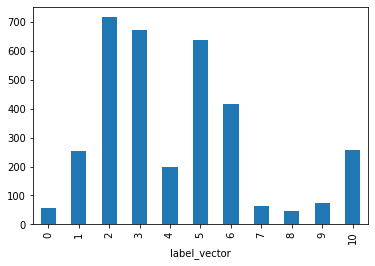

In [ ]:
train.groupby('label_vector').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    rem_tag = re.sub(r'@\S+', '',rem_num)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_tag)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    return " ".join(filtered_words)

train['text']=train['text'].map(lambda s:preprocess(s))


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(train['text']).toarray()
final_features.shape

(3398, 2928)

In [ ]:
'''
# this block is to split the dataset into training and testing set
X = train['text']
Y = train['label_category']

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=12)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))
'''

"\n# this block is to split the dataset into training and testing set \nX = train['text']\nY = train['label_category']\n\n#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)\n\n# instead of doing these steps one at a time, we can use a pipeline to complete then all at once\npipeline = Pipeline([('vect', vectorizer),\n                     ('chi',  SelectKBest(chi2, k=12)),\n                     ('clf', RandomForestClassifier())])\n\n# fitting our model and save it in a pickle for later use\nmodel = pipeline.fit(X_train, y_train)\nwith open('RandomForest.pickle', 'wb') as f:\n    pickle.dump(model, f)\n\nytest = np.array(y_test)\n\n# confusion matrix and classification report(precision, recall, F1-score)\nprint(classification_report(ytest, model.predict(X_test)))\nprint(confusion_matrix(ytest, model.predict(X_test)))\n"

In [ ]:
#X_test.head()

In [ ]:
train_df = pd.DataFrame()
train_df['text'] = train['text']
train_df['label_vector'] = train['label_vector']
train_df.head()

# this block is to split the dataset into training and testing set
#X['text'] = train_df['text']
#Y['label_category'] = train_df['label_category']

train_df, eval_df = train_test_split(train_df, test_size=0.10)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
print(train_df.shape)
print(eval_df.shape)

(3058, 2)
(340, 2)


In [ ]:
## Try splitting into train and test

# **ALBERT**

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import wandb

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 3
model_args.evaluate_during_training = False
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 16
model_args.eval_batch_size = 16
#model_args.labels_list = ['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions']
model_args.wandb_project = "Simple Sweep"

sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "train_loss", "goal": "minimize"},
    "parameters": {
        "num_train_epochs": {"values": [2, 3, 5]},
        "learning_rate": {"min": 5e-5, "max": 4e-4},
    },
}

sweep_id = wandb.sweep(sweep_config, project="Simple Sweep")

wandb.init(project="Simple Sweep", entity="posh279")

wandb.config = {
  "learning_rate": 0.0001,
  "epochs": 3,
  "batch_size": 1
}

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: 2l1vhpst
Sweep URL: https://wandb.ai/posh279/Simple%20Sweep/sweeps/2l1vhpst


wandb: Currently logged in as: svshruti28 (posh279). Use `wandb login --relogin` to force relogin


In [ ]:
albert=ClassificationModel('albert','albert-base-v1',num_labels=11,use_cuda=True,args=model_args) #{
        #"reprocess_input_data" : True,
        #"use_cached_eval_features":False,
        #"overwrite_output_dir": True,
        #"num_train_epochs": 3 }) #Increase for better performance


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.decoder.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

In [ ]:
albert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.717175006866455)

In [ ]:
albert.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▇█▅▄▄▃▃▁▃▄▂
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,1.43555
global_step,550
lr,0.0


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


({'mcc': 0.2879020414460404, 'eval_loss': 1.6728446266867898},
 array([[-0.85400391, -1.06933594,  2.75390625, ..., -0.99414062,
         -1.98144531,  0.41503906],
        [-0.45751953,  2.11914062,  0.13415527, ..., -1.57421875,
         -0.86767578, -1.07226562],
        [-0.63623047,  0.39208984,  0.38232422, ..., -1.08203125,
         -1.5078125 , -1.44726562],
        ...,
        [-1.125     ,  1.33496094,  1.06738281, ..., -0.99365234,
          1.73730469,  1.90429688],
        [-0.56445312,  0.83154297,  0.29199219, ..., -1.50683594,
         -1.63378906, -1.24414062],
        [ 0.34545898,  1.93164062,  0.04690552, ..., -1.31738281,
         -0.75097656, -1.02441406]]),
 [{'guid': 2, 'text_a': 'imagine imagine many dicks fucking whore sucked', 'text_b': None, 'label': 2},
  {'guid': 5, 'text_a': 'gasp telling women want money haha jkjkjk real though', 'text_b': None, 'label': 2},
  {'guid': 6, 'text_a': 'agree point arguably males hard wired breed club attractive female head

# **BERT**

In [ ]:
bert=ClassificationModel('bert','bert-base-uncased',num_labels=11,use_cuda=True,args=model_args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
bert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.5516869227091472)

In [ ]:
bert.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,█▆▅▆▅▄▆▄▁▅▅
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,1.34813
global_step,550
lr,0.0


({'mcc': 0.36630035568351516, 'eval_loss': 1.5744954889470881},
 array([[-1.38867188, -1.328125  ,  3.140625  , ..., -0.75292969,
         -1.06542969, -0.40380859],
        [ 0.62597656,  2.62109375, -1.05078125, ..., -0.73291016,
          0.15759277, -1.1640625 ],
        [-0.65722656,  0.49169922, -0.12768555, ..., -1.55761719,
         -0.83642578, -1.81347656],
        ...,
        [-0.66796875,  0.79248047,  0.64160156, ..., -1.65332031,
         -0.0352478 , -0.91748047],
        [-0.46435547,  0.81542969, -0.43359375, ..., -1.50097656,
         -0.77832031, -1.64453125],
        [ 0.54199219,  2.54101562, -0.83300781, ..., -0.39672852,
          0.06964111, -1.09570312]]),
 [{'guid': 2, 'text_a': 'imagine imagine many dicks fucking whore sucked', 'text_b': None, 'label': 2},
  {'guid': 4, 'text_a': 'external validation happy flοoded mouth juices cock validation', 'text_b': None, 'label': 4},
  {'guid': 6, 'text_a': 'agree point arguably males hard wired breed club attractive f

# **ROBERTA**

In [ ]:
roberta=ClassificationModel('roberta','roberta-base',num_labels=11,use_cuda=True,args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [ ]:
roberta.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.5809847911198933)

In [ ]:
roberta.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,██▃▅▅▄▄▃▄▁▄
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,1.38557
global_step,550
lr,0.0


({'mcc': 0.37132302070031814, 'eval_loss': 1.5984174554998225},
 array([[-1.47949219, -1.21777344,  3.14648438, ..., -0.81738281,
         -1.18652344, -0.1373291 ],
        [ 1.47753906,  3.5       , -1.15039062, ..., -0.28881836,
          0.1842041 , -0.49609375],
        [-0.93115234,  0.43994141,  0.48388672, ..., -1.45410156,
         -1.5       , -1.67480469],
        ...,
        [ 0.45727539,  3.015625  , -0.77050781, ..., -1.15722656,
          1.22265625,  0.16162109],
        [-0.80908203,  1.01269531, -0.11016846, ..., -1.53808594,
         -1.32324219, -1.34667969],
        [ 1.57128906,  3.1875    , -1.09082031, ..., -0.3737793 ,
          0.47827148, -0.50585938]]),
 [{'guid': 2, 'text_a': 'imagine imagine many dicks fucking whore sucked', 'text_b': None, 'label': 2},
  {'guid': 6, 'text_a': 'agree point arguably males hard wired breed club attractive female head drag cave mate whether wishes civilisation evolved modified male behaviour', 'text_b': None, 'label': 1},
  

# **DISTILBERT**

In [ ]:
distilbert=ClassificationModel('distilbert','distilbert-base-cased',num_labels=11,use_cuda=True,args=model_args)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier

In [ ]:
distilbert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.519120004442003)

In [ ]:
distilbert.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,█▅▄▅▄▄▃▁▁▃▂
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.92299
global_step,550
lr,0.0


({'mcc': 0.36260842589636316, 'eval_loss': 1.6149673461914062},
 array([[-1.81835938, -1.20800781,  3.046875  , ..., -0.60498047,
         -1.84570312, -0.27612305],
        [ 0.6171875 ,  3.22460938, -0.79052734, ..., -1.31835938,
          0.0229187 , -0.79541016],
        [-0.94580078, -0.07952881,  0.15795898, ..., -1.61132812,
         -1.04882812, -1.66210938],
        ...,
        [-0.42431641,  1.71777344,  0.0927124 , ..., -1.33300781,
          1.56347656,  1.19726562],
        [-1.04003906,  0.09692383,  0.36352539, ..., -1.75097656,
         -1.0703125 , -1.44824219],
        [ 0.83203125,  2.9765625 , -0.82714844, ..., -0.953125  ,
          0.32861328, -0.51806641]]),
 [{'guid': 2, 'text_a': 'imagine imagine many dicks fucking whore sucked', 'text_b': None, 'label': 2},
  {'guid': 6, 'text_a': 'agree point arguably males hard wired breed club attractive female head drag cave mate whether wishes civilisation evolved modified male behaviour', 'text_b': None, 'label': 1},
  

# **XLNET**

In [ ]:
xlnet=ClassificationModel('xlnet','xlnet-base-cased',num_labels=11,use_cuda=True,args=model_args)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
xlnet.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.739253560702006)

In [ ]:
xlnet.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,██▇▄▆▆▇▁▃▆▂
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,1.29297
global_step,550
lr,0.0


({'mcc': 0.2703708154940288, 'eval_loss': 1.7205429077148438},
 array([[-2.18554688, -0.58837891,  2.42578125, ..., -1.13574219,
         -1.09667969,  1.09277344],
        [-0.76123047,  2.94335938, -0.01461029, ..., -2.359375  ,
         -1.12304688, -1.22460938],
        [-0.76708984,  0.66943359,  0.35498047, ..., -1.77636719,
         -1.47851562, -2.24609375],
        ...,
        [-0.89599609,  0.65136719,  0.5625    , ..., -1.27929688,
          0.53173828,  0.2512207 ],
        [-0.76611328,  1.27734375,  0.27758789, ..., -2.265625  ,
         -1.62890625, -1.85742188],
        [ 0.70751953,  3.49609375, -1.09570312, ..., -1.36328125,
          0.03097534,  0.09118652]]),
 [{'guid': 2, 'text_a': 'imagine imagine many dicks fucking whore sucked', 'text_b': None, 'label': 2},
  {'guid': 6, 'text_a': 'agree point arguably males hard wired breed club attractive female head drag cave mate whether wishes civilisation evolved modified male behaviour', 'text_b': None, 'label': 1},
  {

In [ ]:
wandb.join()

# **TEST**

In [ ]:
# Read the test data from the drive
test = pd.read_csv('/content/test_task_c_entries.csv',',', names=['rewire_id','text'])
dev = pd.read_csv('/content/dev_task_c_entries.csv',',', names=['rewire_id','text'])
dev_labels = pd.read_csv('/content/dev_task_c_labels.csv',',', names=['rewire_id','text'])
test=test.drop(test.index[0:1])
dev=dev.drop(dev.index[0:1])
dev_labels=dev_labels.drop(dev_labels.index[0:1])

In [ ]:
test['text']=test['text'].map(lambda s:preprocess(s))
dev['text']=dev['text'].map(lambda s:preprocess(s))

In [ ]:
test

,rewire_id,text
1,sexism2022_english-10731,tall man must certaily better women large musc...
2,sexism2022_english-7356,lawyer chick shoot mcdonald guy every time mat...
3,sexism2022_english-13064,greek authorities move asylum seekers crowded ...
4,sexism2022_english-17039,statistic women find plurals attractive say st...
5,sexism2022_english-14482,woman speak like donkey braying quiet woman ol...
...,...,...
966,sexism2022_english-18444,fuck women jerk
967,sexism2022_english-2617,agreed wife babe remember third child born wen...
968,sexism2022_english-18744,cracks women men shamed little penis unless pe...
969,sexism2022_english-15798,wow women sluts whores never thought like


In [ ]:
dev

,rewire_id,text
1,sexism2022_english-739,every woman wants model codeword get everythin...
2,sexism2022_english-10787,poor dude realized dont share emotions women s...
3,sexism2022_english-18547,women loyal make loyal understand women modern...
4,sexism2022_english-6425,lefties outraged hour hold princess michael ke...
5,sexism2022_english-10001,slag nerve showing face bitch supposed mother ...
...,...,...
482,sexism2022_english-1846,hey dick sweat guess happens boring pedantic s...
483,sexism2022_english-12865,want see hypergamy hyperdrive work live calif ...
484,sexism2022_english-6864,constant isnt whenever women fall behind matte...
485,sexism2022_english-17934,yep fapping means chase vag better bring full ...


In [ ]:
dev_labels

,rewire_id,text
1,sexism2022_english-739,2.1 descriptive attacks
2,sexism2022_english-10787,2.2 aggressive and emotive attacks
3,sexism2022_english-18547,2.1 descriptive attacks
4,sexism2022_english-6425,1.2 incitement and encouragement of harm
5,sexism2022_english-10001,2.2 aggressive and emotive attacks
...,...,...
482,sexism2022_english-1846,"3.1 casual use of gendered slurs, profanities,..."
483,sexism2022_english-12865,2.1 descriptive attacks
484,sexism2022_english-6864,2.1 descriptive attacks
485,sexism2022_english-17934,2.3 dehumanising attacks & overt sexual object...


In [ ]:
recover= pd.read_csv('/content/test_task_c_entries.csv',',', names=['rewire_id', 'text'])
recover=recover.drop(recover.index[0:1])

sub = pd.DataFrame()
sub['rewire_id'] = recover['rewire_id']
### dev
recover_dev= pd.read_csv('/content/dev_task_c_entries.csv',',', names=['rewire_id', 'text'])
recover_dev=recover_dev.drop(recover_dev.index[0:1])

sub_dev = pd.DataFrame()
sub_dev['rewire_id'] = recover_dev['rewire_id']

# **ALBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = albert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = albert.predict(dev['text'].tolist())
print(predictions1_dev)

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[6, 6, 1, 2, 2, 2, 2, 5, 5, 3, 1, 1, 5, 5, 5, 2, 2, 6, 3, 5, 1, 5, 5, 3, 2, 5, 5, 5, 3, 2, 5, 5, 10, 5, 5, 2, 6, 2, 3, 2, 10, 5, 5, 2, 2, 6, 2, 2, 1, 5, 5, 3, 2, 2, 6, 2, 5, 2, 5, 3, 5, 2, 2, 3, 2, 2, 6, 1, 10, 1, 2, 5, 2, 5, 2, 6, 2, 5, 2, 2, 2, 10, 1, 2, 1, 3, 5, 2, 5, 2, 2, 4, 6, 10, 3, 2, 10, 5, 5, 5, 2, 3, 5, 2, 2, 5, 2, 1, 3, 5, 2, 5, 10, 2, 2, 5, 5, 5, 3, 3, 5, 5, 1, 2, 5, 10, 2, 5, 10, 5, 10, 5, 2, 5, 5, 6, 5, 5, 5, 10, 2, 2, 6, 2, 2, 5, 5, 3, 1, 3, 5, 5, 5, 3, 1, 1, 1, 5, 5, 5, 3, 6, 5, 6, 2, 5, 6, 2, 2, 2, 2, 6, 5, 5, 2, 5, 5, 2, 2, 3, 10, 5, 2, 5, 2, 2, 5, 5, 5, 3, 10, 5, 5, 2, 5, 3, 2, 6, 5, 3, 1, 6, 5, 6, 6, 2, 2, 3, 5, 5, 6, 2, 2, 5, 10, 3, 5, 6, 1, 5, 2, 1, 5, 3, 5, 2, 10, 2, 5, 5, 2, 6, 2, 2, 5, 5, 1, 2, 2, 10, 5, 5, 5, 2, 2, 2, 3, 5, 2, 5, 2, 5, 3, 5, 5, 2, 3, 3, 5, 9, 2, 3, 3, 2, 5, 2, 2, 2, 10, 4, 3, 2, 3, 3, 10, 5, 5, 2, 5, 5, 10, 2, 2, 2, 5, 2, 5, 2, 3, 2, 1, 1, 6, 5, 6, 5, 2, 2, 3, 5, 5, 5, 3, 5, 6, 2, 5, 3, 10, 1, 5, 2, 5, 3, 2, 6, 5, 5, 6, 5, 5, 5, 5, 2, 3, 2, 3

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

[2, 3, 2, 1, 5, 3, 3, 1, 2, 10, 5, 2, 2, 5, 2, 3, 5, 1, 5, 6, 2, 9, 2, 5, 5, 2, 2, 1, 3, 5, 3, 5, 2, 5, 5, 2, 5, 3, 5, 2, 3, 1, 2, 5, 2, 10, 5, 10, 5, 2, 2, 6, 5, 6, 9, 5, 3, 5, 3, 2, 5, 2, 5, 5, 2, 2, 4, 1, 5, 2, 5, 6, 2, 3, 2, 3, 2, 6, 5, 2, 2, 3, 5, 5, 9, 10, 2, 3, 2, 5, 6, 2, 3, 3, 2, 2, 2, 5, 3, 5, 3, 3, 5, 2, 1, 2, 2, 1, 2, 3, 3, 5, 1, 6, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 5, 3, 2, 3, 5, 10, 6, 5, 5, 2, 5, 5, 5, 1, 5, 3, 2, 5, 6, 2, 2, 10, 2, 2, 2, 2, 6, 2, 2, 10, 3, 2, 2, 2, 1, 1, 3, 10, 10, 5, 2, 2, 5, 5, 2, 1, 2, 5, 2, 5, 3, 2, 3, 6, 2, 2, 2, 5, 5, 5, 10, 10, 6, 3, 5, 4, 2, 5, 2, 2, 5, 6, 2, 2, 5, 5, 2, 3, 6, 5, 5, 5, 3, 5, 6, 5, 2, 6, 2, 3, 2, 5, 5, 2, 2, 5, 1, 2, 10, 3, 2, 1, 2, 2, 4, 3, 6, 2, 5, 2, 1, 3, 5, 6, 2, 2, 2, 3, 2, 5, 2, 3, 5, 1, 5, 5, 2, 2, 5, 2, 5, 2, 5, 5, 3, 2, 5, 2, 5, 2, 6, 6, 5, 2, 2, 2, 3, 5, 4, 5, 1, 2, 5, 2, 3, 2, 5, 1, 6, 3, 5, 2, 6, 5, 10, 5, 10, 2, 5, 1, 5, 1, 6, 3, 1, 2, 3, 2, 10, 3, 3, 2, 3, 3, 5, 5, 5, 10, 5, 3, 3, 9, 6, 5, 3, 6, 2, 10, 2, 2, 2, 6, 2

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

['3.2 immutable gender differences and gender stereotypes'
 '3.2 immutable gender differences and gender stereotypes'
 '1.2 incitement and encouragement of harm' '2.1 descriptive attacks'
 '2.1 descriptive attacks' '2.1 descriptive attacks'
 '2.1 descriptive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.1 descriptive attacks' '2.1 descriptive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, prof

In [ ]:
sub['albert_pred'] = prediction2
print(sub.head())

sub_dev['albert_pred'] = prediction2_dev
print(sub_dev.head())

In [ ]:
y_true = dev_labels['text']
y_pred = sub_dev['albert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

0.26451968918300645

                  rewire_id                                        albert_pred
1  sexism2022_english-10731  3.2 immutable gender differences and gender st...
2   sexism2022_english-7356  3.2 immutable gender differences and gender st...
3  sexism2022_english-13064           1.2 incitement and encouragement of harm
4  sexism2022_english-17039                            2.1 descriptive attacks
5  sexism2022_english-14482                            2.1 descriptive attacks
                  rewire_id                                        albert_pred
1    sexism2022_english-739                            2.1 descriptive attacks
2  sexism2022_english-10787                 2.2 aggressive and emotive attacks
3  sexism2022_english-18547                            2.1 descriptive attacks
4   sexism2022_english-6425           1.2 incitement and encouragement of harm
5  sexism2022_english-10001  3.1 casual use of gendered slurs, profanities,...


# **BERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = bert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = bert.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['bert_pred'] = prediction2
print(sub.head())

sub_dev['bert_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['bert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[6, 1, 1, 6, 2, 6, 2, 3, 5, 3, 1, 1, 5, 5, 5, 2, 2, 6, 3, 3, 1, 3, 3, 2, 2, 3, 5, 5, 3, 2, 4, 3, 1, 5, 3, 2, 6, 2, 3, 3, 6, 5, 5, 10, 3, 6, 2, 2, 1, 5, 3, 3, 2, 2, 10, 1, 5, 2, 5, 3, 3, 3, 2, 2, 6, 2, 6, 5, 1, 1, 4, 5, 2, 3, 2, 2, 2, 3, 2, 2, 3, 10, 1, 6, 1, 3, 5, 6, 3, 6, 2, 1, 2, 2, 3, 6, 6, 5, 5, 5, 6, 3, 5, 2, 6, 3, 6, 1, 1, 5, 10, 5, 10, 2, 2, 3, 5, 5, 3, 3, 3, 3, 1, 6, 3, 10, 2, 5, 2, 3, 9, 5, 6, 5, 5, 2, 3, 3, 5, 2, 2, 1, 2, 2, 1, 3, 5, 3, 1, 3, 5, 3, 1, 3, 1, 1, 1, 3, 5, 3, 2, 4, 5, 2, 2, 3, 6, 6, 6, 6, 2, 1, 5, 5, 2, 3, 5, 2, 2, 5, 10, 5, 10, 5, 2, 2, 1, 5, 5, 4, 10, 5, 10, 2, 3, 5, 3, 6, 5, 3, 1, 6, 5, 6, 6, 2, 6, 5, 3, 5, 2, 1, 2, 5, 2, 3, 3, 6, 1, 5, 2, 5, 5, 3, 5, 2, 2, 6, 5, 3, 2, 2, 2, 3, 5, 5, 1, 3, 2, 2, 3, 5, 5, 2, 6, 2, 5, 3, 2, 5, 2, 5, 3, 3, 5, 2, 5, 3, 5, 10, 2, 3, 3, 2, 5, 10, 2, 6, 2, 5, 1, 2, 3, 3, 10, 5, 5, 2, 3, 3, 10, 2, 4, 2, 5, 2, 5, 4, 3, 3, 1, 1, 2, 5, 6, 3, 2, 6, 3, 5, 3, 3, 2, 3, 6, 2, 5, 3, 9, 10, 5, 6, 5, 3, 2, 2, 1, 1, 6, 1, 3, 5, 5, 2, 2, 2, 5, 6, 

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

[6, 3, 2, 1, 3, 2, 3, 1, 2, 2, 1, 6, 10, 3, 2, 3, 3, 1, 3, 6, 1, 1, 2, 5, 5, 6, 2, 1, 3, 5, 2, 3, 2, 3, 5, 2, 5, 3, 3, 2, 3, 1, 2, 3, 2, 10, 5, 2, 5, 2, 2, 6, 5, 6, 2, 1, 3, 3, 5, 2, 5, 4, 3, 3, 6, 2, 4, 4, 5, 3, 3, 10, 3, 2, 2, 3, 1, 6, 3, 4, 6, 3, 3, 3, 2, 10, 2, 2, 2, 3, 6, 1, 3, 2, 2, 2, 2, 3, 3, 5, 3, 3, 5, 3, 1, 2, 2, 1, 2, 3, 3, 5, 10, 2, 2, 6, 6, 6, 2, 6, 10, 5, 4, 2, 3, 3, 3, 6, 3, 5, 10, 4, 3, 1, 1, 5, 5, 3, 1, 5, 3, 2, 5, 2, 2, 2, 10, 1, 2, 6, 6, 6, 2, 1, 2, 3, 6, 2, 10, 3, 1, 3, 10, 10, 3, 10, 2, 3, 5, 6, 1, 2, 3, 2, 5, 10, 2, 3, 2, 2, 2, 2, 5, 5, 5, 2, 2, 2, 3, 3, 4, 2, 5, 4, 2, 5, 2, 2, 2, 3, 5, 2, 3, 6, 5, 5, 5, 5, 3, 6, 5, 6, 2, 4, 1, 2, 5, 1, 2, 2, 1, 1, 2, 10, 2, 2, 3, 2, 2, 1, 3, 1, 3, 4, 2, 10, 3, 5, 2, 2, 6, 4, 1, 2, 5, 2, 3, 5, 4, 4, 1, 2, 2, 5, 2, 5, 2, 5, 5, 5, 10, 5, 1, 3, 6, 2, 6, 5, 10, 2, 4, 3, 5, 6, 5, 1, 3, 5, 2, 3, 1, 3, 1, 6, 3, 2, 4, 6, 3, 1, 5, 10, 6, 5, 1, 5, 1, 2, 3, 10, 1, 10, 6, 10, 3, 1, 10, 2, 5, 5, 5, 1, 10, 3, 2, 5, 1, 2, 5, 4, 6, 2, 1, 2, 6, 2

0.2899551367968497

In [ ]:
predictions1, raw_outputs = bert.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[6, 1, 1, 6, 2, 6, 2, 3, 5, 3, 1, 1, 5, 5, 5, 2, 2, 6, 3, 3, 1, 3, 3, 2, 2, 3, 5, 5, 3, 2, 4, 3, 1, 5, 3, 2, 6, 2, 3, 3, 6, 5, 5, 10, 3, 6, 2, 2, 1, 5, 3, 3, 2, 2, 10, 1, 5, 2, 5, 3, 3, 3, 2, 2, 6, 2, 6, 5, 1, 1, 4, 5, 2, 3, 2, 2, 2, 3, 2, 2, 3, 10, 1, 6, 1, 3, 5, 6, 3, 6, 2, 1, 2, 2, 3, 6, 6, 5, 5, 5, 6, 3, 5, 2, 6, 3, 6, 1, 1, 5, 10, 5, 10, 2, 2, 3, 5, 5, 3, 3, 3, 3, 1, 6, 3, 10, 2, 5, 2, 3, 9, 5, 6, 5, 5, 2, 3, 3, 5, 2, 2, 1, 2, 2, 1, 3, 5, 3, 1, 3, 5, 3, 1, 3, 1, 1, 1, 3, 5, 3, 2, 4, 5, 2, 2, 3, 6, 6, 6, 6, 2, 1, 5, 5, 2, 3, 5, 2, 2, 5, 10, 5, 10, 5, 2, 2, 1, 5, 5, 4, 10, 5, 10, 2, 3, 5, 3, 6, 5, 3, 1, 6, 5, 6, 6, 2, 6, 5, 3, 5, 2, 1, 2, 5, 2, 3, 3, 6, 1, 5, 2, 5, 5, 3, 5, 2, 2, 6, 5, 3, 2, 2, 2, 3, 5, 5, 1, 3, 2, 2, 3, 5, 5, 2, 6, 2, 5, 3, 2, 5, 2, 5, 3, 3, 5, 2, 5, 3, 5, 10, 2, 3, 3, 2, 5, 10, 2, 6, 2, 5, 1, 2, 3, 3, 10, 5, 5, 2, 3, 3, 10, 2, 4, 2, 5, 2, 5, 4, 3, 3, 1, 1, 2, 5, 6, 3, 2, 6, 3, 5, 3, 3, 2, 3, 6, 2, 5, 3, 9, 10, 5, 6, 5, 3, 2, 2, 1, 1, 6, 1, 3, 5, 5, 2, 2, 2, 5, 6, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['3.2 immutable gender differences and gender stereotypes'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.2 immutable gender differences and gender stereotypes'
 '2.1 descriptive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.1 descriptive attacks' '2.1 descriptive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '2.2 aggressive and emotive attacks' '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '2.2 aggressive and emotive attacks' '

In [ ]:
sub['bert_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks


# **ROBERTA PREDICTIONS**

In [ ]:
predictions1, raw_outputs = roberta.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = roberta.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['roberta_pred'] = prediction2
print(sub.head())

sub_dev['roberta_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['roberta_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[6, 1, 1, 6, 2, 2, 2, 3, 5, 3, 1, 1, 5, 5, 5, 3, 1, 6, 3, 3, 1, 3, 3, 2, 2, 3, 5, 5, 5, 2, 5, 3, 3, 5, 3, 2, 6, 2, 3, 3, 6, 5, 5, 2, 3, 6, 1, 2, 3, 5, 3, 3, 2, 2, 2, 2, 5, 2, 5, 2, 3, 3, 10, 2, 6, 2, 6, 3, 2, 1, 5, 5, 2, 3, 2, 2, 2, 3, 2, 3, 3, 10, 2, 2, 1, 3, 5, 6, 3, 2, 2, 2, 2, 10, 3, 3, 10, 5, 5, 5, 6, 3, 5, 2, 6, 5, 6, 1, 1, 5, 10, 5, 9, 2, 2, 3, 5, 5, 3, 3, 3, 3, 3, 2, 3, 10, 2, 5, 2, 3, 9, 5, 2, 3, 3, 2, 3, 5, 5, 2, 2, 2, 2, 2, 4, 3, 5, 3, 1, 2, 3, 3, 5, 3, 1, 1, 3, 3, 5, 3, 2, 4, 5, 6, 2, 3, 6, 6, 6, 6, 2, 2, 5, 3, 2, 5, 5, 2, 2, 3, 10, 5, 6, 5, 2, 2, 4, 5, 3, 3, 10, 5, 5, 2, 3, 3, 3, 6, 5, 5, 4, 6, 5, 6, 6, 9, 2, 3, 3, 5, 2, 1, 2, 5, 2, 3, 3, 2, 1, 5, 2, 3, 3, 3, 5, 2, 2, 2, 3, 5, 2, 6, 6, 2, 3, 5, 5, 2, 2, 10, 3, 5, 3, 2, 10, 6, 3, 3, 2, 5, 2, 5, 5, 3, 3, 3, 3, 3, 3, 9, 2, 2, 3, 6, 3, 2, 6, 2, 10, 3, 1, 2, 3, 3, 10, 5, 5, 10, 5, 3, 2, 10, 2, 2, 5, 2, 3, 1, 3, 3, 5, 1, 2, 3, 6, 5, 2, 2, 3, 5, 3, 3, 3, 3, 6, 2, 5, 3, 10, 9, 5, 2, 5, 3, 2, 3, 5, 5, 6, 5, 3, 5, 5, 6, 2, 6, 3, 6, 

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

[2, 3, 2, 1, 3, 2, 3, 1, 2, 2, 3, 6, 6, 5, 2, 3, 3, 1, 3, 6, 2, 5, 2, 3, 5, 6, 3, 1, 3, 5, 2, 3, 2, 3, 5, 2, 5, 3, 3, 2, 3, 1, 2, 3, 2, 10, 5, 2, 5, 2, 2, 6, 5, 6, 1, 1, 3, 3, 3, 2, 5, 2, 5, 3, 6, 2, 4, 4, 3, 3, 5, 2, 2, 3, 3, 3, 2, 6, 3, 2, 6, 3, 3, 3, 2, 10, 2, 2, 2, 3, 6, 1, 3, 3, 2, 6, 3, 3, 3, 5, 3, 3, 5, 2, 3, 2, 6, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 6, 2, 6, 10, 5, 2, 2, 3, 3, 3, 6, 3, 5, 10, 6, 5, 4, 5, 5, 5, 3, 2, 5, 3, 2, 5, 3, 1, 2, 10, 2, 2, 6, 6, 6, 2, 1, 10, 3, 6, 6, 2, 5, 1, 1, 10, 2, 3, 10, 2, 3, 5, 2, 1, 6, 3, 2, 5, 3, 2, 3, 6, 3, 2, 2, 5, 5, 5, 2, 9, 6, 3, 3, 4, 2, 3, 1, 2, 3, 2, 2, 2, 3, 5, 2, 2, 6, 5, 5, 5, 1, 3, 6, 5, 2, 6, 2, 3, 10, 5, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 6, 2, 1, 2, 1, 3, 5, 2, 1, 3, 5, 2, 3, 2, 3, 2, 2, 5, 2, 3, 5, 4, 5, 5, 2, 2, 3, 10, 5, 2, 3, 5, 3, 2, 5, 1, 3, 6, 2, 6, 5, 10, 2, 2, 3, 5, 4, 5, 1, 3, 5, 2, 3, 3, 3, 4, 2, 3, 5, 2, 6, 3, 1, 3, 10, 6, 3, 1, 5, 1, 6, 3, 2, 1, 10, 2, 3, 3, 1, 2, 2, 5, 3, 5, 4, 2, 3, 2, 3, 1, 2, 5, 3, 6, 2, 1, 2, 3, 6, 4, 6, 2,

0.3086404739444039

In [ ]:
predictions1, raw_outputs = roberta.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[6, 1, 1, 6, 2, 2, 2, 3, 5, 3, 1, 1, 5, 5, 5, 3, 1, 6, 3, 3, 1, 3, 3, 2, 2, 3, 5, 5, 5, 2, 5, 3, 3, 5, 3, 2, 6, 2, 3, 3, 6, 5, 5, 2, 3, 6, 1, 2, 3, 5, 3, 3, 2, 2, 2, 2, 5, 2, 5, 2, 3, 3, 10, 2, 6, 2, 6, 3, 2, 1, 5, 5, 2, 3, 2, 2, 2, 3, 2, 3, 3, 10, 2, 2, 1, 3, 5, 6, 3, 2, 2, 2, 2, 10, 3, 3, 10, 5, 5, 5, 6, 3, 5, 2, 6, 5, 6, 1, 1, 5, 10, 5, 9, 2, 2, 3, 5, 5, 3, 3, 3, 3, 3, 2, 3, 10, 2, 5, 2, 3, 9, 5, 2, 3, 3, 2, 3, 5, 5, 2, 2, 2, 2, 2, 4, 3, 5, 3, 1, 2, 3, 3, 5, 3, 1, 1, 3, 3, 5, 3, 2, 4, 5, 6, 2, 3, 6, 6, 6, 6, 2, 2, 5, 3, 2, 5, 5, 2, 2, 3, 10, 5, 6, 5, 2, 2, 4, 5, 3, 3, 10, 5, 5, 2, 3, 3, 3, 6, 5, 5, 4, 6, 5, 6, 6, 9, 2, 3, 3, 5, 2, 1, 2, 5, 2, 3, 3, 2, 1, 5, 2, 3, 3, 3, 5, 2, 2, 2, 3, 5, 2, 6, 6, 2, 3, 5, 5, 2, 2, 10, 3, 5, 3, 2, 10, 6, 3, 3, 2, 5, 2, 5, 5, 3, 3, 3, 3, 3, 3, 9, 2, 2, 3, 6, 3, 2, 6, 2, 10, 3, 1, 2, 3, 3, 10, 5, 5, 10, 5, 3, 2, 10, 2, 2, 5, 2, 3, 1, 3, 3, 5, 1, 2, 3, 6, 5, 2, 2, 3, 5, 3, 3, 3, 3, 6, 2, 5, 3, 10, 9, 5, 2, 5, 3, 2, 3, 5, 5, 6, 5, 3, 5, 5, 6, 2, 6, 3, 6, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['3.2 immutable gender differences and gender stereotypes'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.2 immutable gender differences and gender stereotypes'
 '2.1 descriptive attacks' '2.1 descriptive attacks'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '3.2 immutable gender differences and gender stereotypes'
 '2.2 aggressive and emotive attacks' '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '2.2 aggressive and emotive attacks' '2.2 

In [ ]:
sub['roberta_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks


# **DISTILBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = distilbert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = distilbert.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['distilbert_pred'] = prediction2
print(sub.head())

sub_dev['distilbert_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['distilbert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[2, 2, 3, 2, 2, 10, 2, 5, 5, 3, 1, 1, 5, 3, 5, 2, 3, 6, 4, 3, 1, 3, 3, 2, 2, 5, 5, 5, 3, 10, 5, 5, 1, 5, 5, 2, 6, 2, 3, 3, 6, 5, 5, 10, 3, 6, 2, 2, 1, 5, 3, 3, 2, 2, 6, 1, 5, 2, 5, 3, 3, 3, 10, 2, 6, 2, 4, 3, 2, 1, 4, 5, 2, 3, 4, 2, 2, 3, 2, 2, 2, 10, 10, 2, 1, 3, 5, 2, 3, 6, 2, 1, 2, 2, 3, 2, 10, 3, 5, 3, 2, 3, 5, 2, 6, 5, 2, 1, 5, 5, 2, 5, 10, 2, 2, 2, 5, 5, 3, 3, 3, 3, 1, 4, 5, 10, 2, 5, 3, 5, 10, 3, 10, 5, 5, 2, 3, 5, 5, 10, 2, 2, 2, 3, 1, 3, 5, 3, 1, 3, 5, 3, 5, 3, 1, 1, 1, 3, 5, 3, 10, 6, 5, 6, 2, 3, 6, 6, 6, 6, 4, 1, 5, 5, 6, 5, 5, 2, 2, 5, 10, 5, 2, 5, 2, 2, 4, 5, 3, 4, 2, 5, 1, 2, 3, 5, 3, 6, 5, 3, 4, 2, 5, 6, 6, 10, 2, 5, 3, 5, 2, 1, 2, 5, 2, 5, 5, 6, 1, 5, 10, 2, 5, 3, 5, 2, 2, 6, 5, 5, 2, 4, 2, 2, 5, 5, 5, 3, 2, 2, 3, 5, 5, 6, 6, 6, 3, 5, 6, 5, 2, 5, 5, 5, 3, 3, 3, 3, 5, 10, 2, 2, 3, 6, 5, 6, 2, 2, 2, 2, 1, 2, 3, 5, 10, 5, 5, 2, 5, 3, 3, 10, 2, 2, 5, 6, 3, 2, 3, 1, 1, 1, 6, 5, 6, 3, 2, 6, 3, 5, 3, 3, 2, 5, 6, 2, 5, 3, 10, 3, 5, 6, 5, 3, 2, 2, 5, 5, 6, 5, 5, 5, 5, 2, 3, 2, 3

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

[2, 3, 2, 1, 3, 2, 3, 1, 2, 2, 3, 6, 6, 3, 2, 3, 5, 1, 3, 6, 3, 5, 2, 3, 5, 2, 3, 1, 3, 5, 2, 5, 2, 3, 1, 2, 5, 3, 5, 2, 3, 1, 10, 3, 2, 10, 5, 2, 5, 2, 2, 6, 5, 6, 10, 4, 3, 3, 3, 2, 5, 2, 5, 3, 6, 2, 4, 2, 3, 4, 5, 10, 3, 3, 1, 5, 4, 6, 3, 2, 2, 3, 3, 3, 2, 10, 2, 2, 4, 3, 6, 2, 3, 1, 2, 2, 2, 5, 3, 5, 3, 3, 5, 3, 1, 2, 2, 1, 2, 5, 3, 5, 10, 2, 2, 6, 2, 6, 2, 6, 2, 3, 2, 2, 5, 3, 2, 6, 3, 5, 10, 6, 5, 1, 5, 5, 5, 5, 1, 5, 3, 2, 5, 2, 4, 2, 10, 2, 2, 6, 6, 6, 2, 1, 10, 3, 6, 6, 6, 1, 1, 3, 2, 2, 5, 10, 2, 3, 5, 2, 1, 2, 3, 2, 5, 4, 2, 3, 6, 2, 2, 2, 5, 5, 5, 2, 10, 2, 3, 5, 4, 10, 3, 2, 2, 5, 6, 2, 2, 5, 5, 2, 2, 6, 5, 5, 5, 5, 3, 6, 5, 2, 6, 4, 3, 2, 5, 3, 2, 3, 1, 1, 2, 10, 2, 2, 1, 2, 2, 4, 2, 1, 2, 5, 2, 2, 3, 5, 2, 2, 2, 5, 4, 2, 5, 2, 3, 5, 1, 4, 5, 6, 2, 5, 2, 5, 2, 5, 5, 3, 10, 5, 2, 3, 2, 2, 6, 5, 3, 2, 4, 3, 5, 4, 5, 1, 3, 5, 2, 3, 3, 3, 4, 6, 3, 5, 2, 6, 5, 1, 5, 10, 2, 5, 1, 5, 1, 2, 3, 1, 1, 10, 6, 3, 3, 4, 2, 2, 5, 3, 5, 4, 10, 3, 2, 3, 1, 2, 5, 4, 6, 2, 9, 2, 2, 2, 6, 6

0.3016489412720848

In [ ]:
predictions1, raw_outputs = distilbert.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[2, 2, 3, 2, 2, 10, 2, 5, 5, 3, 1, 1, 5, 3, 5, 2, 3, 6, 4, 3, 1, 3, 3, 2, 2, 5, 5, 5, 3, 10, 5, 5, 1, 5, 5, 2, 6, 2, 3, 3, 6, 5, 5, 10, 3, 6, 2, 2, 1, 5, 3, 3, 2, 2, 6, 1, 5, 2, 5, 3, 3, 3, 10, 2, 6, 2, 4, 3, 2, 1, 4, 5, 2, 3, 4, 2, 2, 3, 2, 2, 2, 10, 10, 2, 1, 3, 5, 2, 3, 6, 2, 1, 2, 2, 3, 2, 10, 3, 5, 3, 2, 3, 5, 2, 6, 5, 2, 1, 5, 5, 2, 5, 10, 2, 2, 2, 5, 5, 3, 3, 3, 3, 1, 4, 5, 10, 2, 5, 3, 5, 10, 3, 10, 5, 5, 2, 3, 5, 5, 10, 2, 2, 2, 3, 1, 3, 5, 3, 1, 3, 5, 3, 5, 3, 1, 1, 1, 3, 5, 3, 10, 6, 5, 6, 2, 3, 6, 6, 6, 6, 4, 1, 5, 5, 6, 5, 5, 2, 2, 5, 10, 5, 2, 5, 2, 2, 4, 5, 3, 4, 2, 5, 1, 2, 3, 5, 3, 6, 5, 3, 4, 2, 5, 6, 6, 10, 2, 5, 3, 5, 2, 1, 2, 5, 2, 5, 5, 6, 1, 5, 10, 2, 5, 3, 5, 2, 2, 6, 5, 5, 2, 4, 2, 2, 5, 5, 5, 3, 2, 2, 3, 5, 5, 6, 6, 6, 3, 5, 6, 5, 2, 5, 5, 5, 3, 3, 3, 3, 5, 10, 2, 2, 3, 6, 5, 6, 2, 2, 2, 2, 1, 2, 3, 5, 10, 5, 5, 2, 5, 3, 3, 10, 2, 2, 5, 6, 3, 2, 3, 1, 1, 1, 6, 5, 6, 3, 2, 6, 3, 5, 3, 3, 2, 5, 6, 2, 5, 3, 10, 3, 5, 6, 5, 3, 2, 2, 5, 5, 6, 5, 5, 5, 5, 2, 3, 2, 3

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['2.1 descriptive attacks' '2.1 descriptive attacks'
 '2.2 aggressive and emotive attacks' '2.1 descriptive attacks'
 '2.1 descriptive attacks'
 '4.2 supporting systemic discrimination against women as a group'
 '2.1 descriptive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '2.3 dehumanising attacks & overt sexual objectification'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '2.2 aggressive and emotive attacks' '2.2 aggressive and emotive attacks'
 '2.1 descr

In [ ]:
sub['distilbert_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks


# **XLNET PREDICTIONS**

In [ ]:
predictions1, raw_outputs = xlnet.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = xlnet.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['xlnet_pred'] = prediction2
print(sub.head())

sub_dev['xlnet_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['xlnet_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[2, 2, 1, 6, 6, 6, 2, 3, 5, 3, 1, 1, 5, 3, 5, 2, 2, 6, 2, 3, 1, 3, 3, 2, 2, 3, 5, 5, 5, 2, 5, 5, 10, 5, 5, 2, 2, 2, 5, 2, 6, 5, 5, 3, 2, 2, 6, 2, 5, 5, 3, 2, 2, 2, 2, 2, 5, 2, 5, 2, 3, 2, 6, 2, 6, 3, 6, 5, 2, 10, 2, 5, 2, 3, 2, 2, 2, 5, 2, 2, 3, 10, 3, 2, 1, 3, 5, 6, 3, 2, 2, 1, 2, 2, 3, 10, 10, 5, 5, 3, 2, 3, 5, 2, 6, 5, 6, 1, 3, 5, 10, 3, 2, 2, 2, 3, 5, 5, 3, 3, 3, 3, 4, 2, 5, 6, 2, 5, 3, 5, 1, 3, 2, 3, 3, 2, 3, 3, 5, 6, 6, 2, 10, 3, 1, 5, 5, 3, 1, 2, 3, 3, 5, 3, 1, 1, 1, 3, 4, 3, 2, 6, 5, 6, 2, 3, 6, 6, 6, 6, 2, 1, 5, 5, 2, 5, 5, 2, 2, 5, 10, 5, 2, 5, 2, 2, 1, 5, 3, 4, 2, 5, 3, 2, 3, 5, 3, 6, 5, 3, 1, 2, 3, 6, 6, 2, 6, 3, 5, 3, 2, 1, 2, 5, 2, 3, 3, 6, 1, 5, 2, 5, 5, 3, 5, 6, 2, 6, 3, 5, 6, 2, 2, 2, 5, 5, 1, 2, 6, 1, 3, 3, 3, 2, 6, 2, 3, 3, 6, 3, 10, 3, 3, 3, 5, 2, 3, 3, 5, 10, 2, 2, 3, 2, 5, 2, 6, 2, 6, 3, 3, 2, 5, 5, 2, 5, 5, 10, 3, 3, 2, 2, 3, 2, 5, 6, 5, 10, 3, 3, 1, 1, 2, 3, 6, 3, 2, 2, 3, 5, 3, 3, 3, 3, 6, 3, 3, 3, 10, 10, 5, 6, 3, 5, 6, 3, 5, 5, 6, 4, 3, 5, 3, 6, 3, 2, 3, 2, 3

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

[2, 3, 2, 1, 3, 2, 3, 1, 2, 2, 3, 6, 3, 3, 4, 3, 3, 1, 5, 6, 2, 4, 2, 5, 5, 2, 3, 1, 3, 5, 2, 5, 2, 3, 5, 2, 5, 3, 5, 10, 5, 1, 2, 3, 2, 10, 5, 2, 5, 2, 6, 6, 5, 6, 1, 1, 3, 3, 2, 2, 5, 5, 3, 3, 6, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 6, 3, 5, 6, 3, 3, 3, 2, 10, 2, 3, 2, 3, 6, 1, 3, 3, 2, 2, 2, 5, 3, 5, 2, 3, 5, 3, 3, 2, 2, 1, 2, 3, 3, 3, 10, 2, 6, 6, 6, 6, 2, 6, 2, 5, 5, 6, 5, 3, 3, 2, 2, 5, 10, 2, 5, 5, 3, 5, 5, 3, 2, 5, 3, 3, 5, 2, 1, 3, 2, 2, 2, 6, 6, 2, 2, 2, 2, 3, 6, 2, 6, 5, 1, 3, 6, 10, 5, 6, 2, 3, 5, 2, 1, 2, 3, 2, 5, 4, 2, 3, 6, 2, 2, 2, 5, 5, 5, 2, 6, 2, 3, 3, 3, 10, 3, 2, 2, 5, 2, 2, 2, 5, 5, 2, 2, 6, 5, 5, 3, 4, 3, 6, 5, 2, 2, 2, 3, 2, 5, 5, 2, 2, 1, 1, 2, 1, 2, 2, 10, 2, 2, 4, 2, 2, 2, 3, 2, 10, 3, 5, 2, 2, 2, 4, 3, 2, 5, 2, 3, 5, 3, 3, 5, 6, 2, 5, 2, 5, 2, 3, 5, 5, 2, 5, 2, 3, 6, 2, 6, 5, 2, 6, 2, 4, 5, 2, 5, 1, 2, 5, 6, 3, 2, 5, 6, 2, 3, 5, 10, 2, 5, 1, 3, 10, 6, 3, 2, 5, 1, 2, 3, 4, 1, 2, 2, 2, 5, 1, 6, 2, 3, 3, 5, 4, 2, 3, 2, 5, 1, 2, 5, 3, 6, 2, 2, 6, 2, 2, 10, 2, 2, 

0.2591844588871571

In [ ]:
predictions1, raw_outputs = xlnet.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

[2, 2, 1, 6, 6, 6, 2, 3, 5, 3, 1, 1, 5, 3, 5, 2, 2, 6, 2, 3, 1, 3, 3, 2, 2, 3, 5, 5, 5, 2, 5, 5, 10, 5, 5, 2, 2, 2, 5, 2, 6, 5, 5, 3, 2, 2, 6, 2, 5, 5, 3, 2, 2, 2, 2, 2, 5, 2, 5, 2, 3, 2, 6, 2, 6, 3, 6, 5, 2, 10, 2, 5, 2, 3, 2, 2, 2, 5, 2, 2, 3, 10, 3, 2, 1, 3, 5, 6, 3, 2, 2, 1, 2, 2, 3, 10, 10, 5, 5, 3, 2, 3, 5, 2, 6, 5, 6, 1, 3, 5, 10, 3, 2, 2, 2, 3, 5, 5, 3, 3, 3, 3, 4, 2, 5, 6, 2, 5, 3, 5, 1, 3, 2, 3, 3, 2, 3, 3, 5, 6, 6, 2, 10, 3, 1, 5, 5, 3, 1, 2, 3, 3, 5, 3, 1, 1, 1, 3, 4, 3, 2, 6, 5, 6, 2, 3, 6, 6, 6, 6, 2, 1, 5, 5, 2, 5, 5, 2, 2, 5, 10, 5, 2, 5, 2, 2, 1, 5, 3, 4, 2, 5, 3, 2, 3, 5, 3, 6, 5, 3, 1, 2, 3, 6, 6, 2, 6, 3, 5, 3, 2, 1, 2, 5, 2, 3, 3, 6, 1, 5, 2, 5, 5, 3, 5, 6, 2, 6, 3, 5, 6, 2, 2, 2, 5, 5, 1, 2, 6, 1, 3, 3, 3, 2, 6, 2, 3, 3, 6, 3, 10, 3, 3, 3, 5, 2, 3, 3, 5, 10, 2, 2, 3, 2, 5, 2, 6, 2, 6, 3, 3, 2, 5, 5, 2, 5, 5, 10, 3, 3, 2, 2, 3, 2, 5, 6, 5, 10, 3, 3, 1, 1, 2, 3, 6, 3, 2, 2, 3, 5, 3, 3, 3, 3, 6, 3, 3, 3, 10, 10, 5, 6, 3, 5, 6, 3, 5, 5, 6, 4, 3, 5, 3, 6, 3, 2, 3, 2, 3

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['2.1 descriptive attacks' '2.1 descriptive attacks'
 '1.2 incitement and encouragement of harm'
 '3.2 immutable gender differences and gender stereotypes'
 '3.2 immutable gender differences and gender stereotypes'
 '3.2 immutable gender differences and gender stereotypes'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.2 aggressive and emotive attacks'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '2.1 descriptive attacks' '2.1 descriptive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '2.1 descriptive attacks' '2.2 aggressive and emotive attacks'
 '1.2 incitement and encouragement of harm'
 '2.2 aggressive and emotive attacks' '2.2 aggressive and emotive attacks'
 '2.1 descriptive

In [ ]:
sub['xlnet_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks,2.1 descriptive attacks
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...


# **Formatting Dataframe for Submission**

In [ ]:
sub['albert'] = sub['albert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['bert'] = sub['bert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['roberta'] = sub['roberta_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['distilbert'] = sub['distilbert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['xlnet'] = sub['xlnet_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks,2.1 descriptive attacks
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...


In [ ]:
sub_dev['albert'] = sub_dev['albert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['bert'] = sub_dev['bert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['roberta'] = sub_dev['roberta_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['distilbert'] = sub_dev['distilbert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['xlnet'] = sub_dev['xlnet_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

sub_dev.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet
1,sexism2022_english-739,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks
2,sexism2022_english-10787,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks
3,sexism2022_english-18547,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks
4,sexism2022_english-6425,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
5,sexism2022_english-10001,"3.1 casual use of gendered slurs, profanities,...",2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks


In [ ]:
import statistics
pred_val = []
for i in range(1, sub.shape[0] + 1): #iterate over rows
    row_val = []
    for j in ['roberta', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value = sub.at[i, j] #get cell value
        row_val.append(value)
    pred_val.append(statistics.mode(row_val))
print(pred_val)

['3.2 immutable gender differences and gender stereotypes', '1.2 incitement and encouragement of harm', '1.2 incitement and encouragement of harm', '3.2 immutable gender differences and gender stereotypes', '2.1 descriptive attacks', '3.2 immutable gender differences and gender stereotypes', '2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '3.1 casual use of gendered slurs, profanities, and insults', '2.2 aggressive and emotive attacks', '1.2 incitement and encouragement of harm', '1.2 incitement and encouragement of harm', '3.1 casual use of gendered slurs, profanities, and insults', '3.1 casual use of gendered slurs, profanities, and insults', '3.1 casual use of gendered slurs, profanities, and insults', '2.1 descriptive attacks', '2.1 descriptive attacks', '3.2 immutable gender differences and gender stereotypes', '2.2 aggressive and emotive attacks', '2.2 aggressive and emotive attacks', '1.2 incitement and encouragement of harm', '2.2 aggressive and emotive attacks

In [ ]:
import statistics
pred_val_dev = []
for i in range(1, sub_dev.shape[0] + 1): #iterate over rows
    row_val_dev = []
    for j in ['roberta', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value_dev = sub_dev.at[i, j] #get cell value
        row_val_dev.append(value_dev)
    pred_val_dev.append(statistics.mode(row_val_dev))
print(pred_val_dev)

['2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '2.1 descriptive attacks', '1.2 incitement and encouragement of harm', '2.2 aggressive and emotive attacks', '2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '1.2 incitement and encouragement of harm', '2.1 descriptive attacks', '2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '3.2 immutable gender differences and gender stereotypes', '3.2 immutable gender differences and gender stereotypes', '2.2 aggressive and emotive attacks', '2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '2.2 aggressive and emotive attacks', '1.2 incitement and encouragement of harm', '2.2 aggressive and emotive attacks', '3.2 immutable gender differences and gender stereotypes', '2.1 descriptive attacks', '3.1 casual use of gendered slurs, profanities, and insults', '2.1 descriptive attacks', '2.2 aggressive and emotive attacks', '3.1 casual use of gendered slurs, profanities, and insults', '3.2 imm

In [ ]:
sub['label_pred_enc'] = pred_val
sub['label_pred'] = sub['label_pred_enc'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'])
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet,label_pred_enc,label_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...
2,sexism2022_english-7356,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.1 descriptive attacks,2.1 descriptive attacks,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
3,sexism2022_english-13064,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,2.2 aggressive and emotive attacks,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks


In [ ]:
sub_dev['label_pred_enc'] = pred_val_dev
sub_dev['label_pred'] = sub_dev['label_pred_enc'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'])
sub_dev.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet,label_pred_enc,label_pred
1,sexism2022_english-739,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,3.2 immutable gender differences and gender st...,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks
2,sexism2022_english-10787,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks
3,sexism2022_english-18547,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks,2.1 descriptive attacks
4,sexism2022_english-6425,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm
5,sexism2022_english-10001,"3.1 casual use of gendered slurs, profanities,...",2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks,2.2 aggressive and emotive attacks


In [ ]:
final_sub = pd.DataFrame()
final_sub['rewire_id'] = sub['rewire_id']
final_sub['label_pred'] = sub['label_pred']

final_sub.head(100)

,rewire_id,label_pred
1,sexism2022_english-10731,3.2 immutable gender differences and gender st...
2,sexism2022_english-7356,1.2 incitement and encouragement of harm
3,sexism2022_english-13064,1.2 incitement and encouragement of harm
4,sexism2022_english-17039,3.2 immutable gender differences and gender st...
5,sexism2022_english-14482,2.1 descriptive attacks
...,...,...
96,sexism2022_english-8575,2.2 aggressive and emotive attacks
97,sexism2022_english-3755,4.2 supporting systemic discrimination against...
98,sexism2022_english-12277,"3.1 casual use of gendered slurs, profanities,..."
99,sexism2022_english-6906,"3.1 casual use of gendered slurs, profanities,..."


In [ ]:
final_sub_dev = pd.DataFrame()
final_sub_dev['rewire_id'] = sub_dev['rewire_id']
final_sub_dev['label_pred'] = sub_dev['label_pred']

final_sub_dev.head(100)

,rewire_id,label_pred
1,sexism2022_english-739,2.1 descriptive attacks
2,sexism2022_english-10787,2.2 aggressive and emotive attacks
3,sexism2022_english-18547,2.1 descriptive attacks
4,sexism2022_english-6425,1.2 incitement and encouragement of harm
5,sexism2022_english-10001,2.2 aggressive and emotive attacks
...,...,...
96,sexism2022_english-5347,2.1 descriptive attacks
97,sexism2022_english-15065,2.1 descriptive attacks
98,sexism2022_english-17037,2.2 aggressive and emotive attacks
99,sexism2022_english-15696,2.2 aggressive and emotive attacks


In [ ]:
y_true = dev_labels['text']
y_pred = final_sub_dev['label_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

0.3114921854929333

In [ ]:
final_sub.to_csv('/content/SemEval_TaskC.csv')